# Tutorial Part-of-Speech tagging  Con Deep Learning

### En este tutorial, veremos cómo puede usar un modelo simple en Keras, para entrenar y evaluar una red neuronal artificial  BLSTM para problemas de clasificación de múltiples clases.

## PARTE 1  -  Pre-Procesamiento

In [1]:
# Asegurar reproducibilidad

import numpy as np

CUSTOM_SEED = 42
np.random.seed(CUSTOM_SEED)

### Descargamos el Corpus Ancora - Cess_esp del nltk

In [2]:
import nltk
nltk.download('cess_esp')

[nltk_data] Downloading package cess_esp to /home/deep-
[nltk_data]     learning/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


True

### Extraemos las oraciones tageadas del Corpus

In [3]:
import random
from nltk.corpus import cess_esp

tagged_sentences = cess_esp.tagged_sents()
#print('a random sentence: \n-> {}'.format(random.choice(sentences)))

### Extraemos los datos de la cantidad de oraciones a ser usadas y un ejemplo de una oracion presente en el corpus

In [4]:
print(tagged_sentences[0])
print("Tagged sentences: ", len(tagged_sentences))
print("Tagged words:", len(cess_esp.tagged_words()))

[('El', 'da0ms0'), ('grupo', 'ncms000'), ('estatal', 'aq0cs0'), ('Electricité_de_France', 'np00000'), ('-Fpa-', 'Fpa'), ('EDF', 'np00000'), ('-Fpt-', 'Fpt'), ('anunció', 'vmis3s0'), ('hoy', 'rg'), (',', 'Fc'), ('jueves', 'W'), (',', 'Fc'), ('la', 'da0fs0'), ('compra', 'ncfs000'), ('del', 'spcms'), ('51_por_ciento', 'Zp'), ('de', 'sps00'), ('la', 'da0fs0'), ('empresa', 'ncfs000'), ('mexicana', 'aq0fs0'), ('Electricidad_Águila_de_Altamira', 'np00000'), ('-Fpa-', 'Fpa'), ('EAA', 'np00000'), ('-Fpt-', 'Fpt'), (',', 'Fc'), ('creada', 'aq0fsp'), ('por', 'sps00'), ('el', 'da0ms0'), ('japonés', 'aq0ms0'), ('Mitsubishi_Corporation', 'np00000'), ('para', 'sps00'), ('poner_en_marcha', 'vmn0000'), ('una', 'di0fs0'), ('central', 'ncfs000'), ('de', 'sps00'), ('gas', 'ncms000'), ('de', 'sps00'), ('495', 'Z'), ('megavatios', 'ncmp000'), ('.', 'Fp')]
Tagged sentences:  6030
Tagged words: 192685


### Se procede a Dividir en una lista de Oraciones dividida en lista de palabras y cada palabra con un correspondiente tag en un alista diferente

In [5]:
import numpy as np
import pickle

sentences, tagss = [], []
for tagged_sentence in tagged_sentences:
    sentence, tags = zip(*tagged_sentence)
    sentences.append(np.array(sentence))
    tagss.append(np.array(tags))
    
with open("vectors/sentences.txt", "wb") as fp:
    pickle.dump(sentences, fp)

with open("vectors/tags.txt", "wb") as fp:
    pickle.dump(tagss, fp)


### Imprimimos una posicion de la lista como ejemplo

In [6]:
print(len(sentences))
print(sentences[6])
print(tags[6])

6030
['La' 'alcaldesa' 'de' 'Málaga' 'y' 'cabeza' 'de' 'lista' 'del' 'PP' 'al'
 'Congreso' 'por' 'esta' 'provincia' ',' 'Celia_Villalobos' ',' 'pidió'
 'hoy' 'a' 'los' 'militantes' 'de' 'esta' 'formación' 'que' '*0*' 'sepan'
 '"' 'administrar' 'la' 'victoria' '"' ',' 'porque' '"' 'no' 'vale' 'la'
 'revancha' ',' 'el' 'insulto' 'o' 'el' 'ataque' ',' 'eso' 'es' 'para'
 'ellos' '"' '.']
dp3cp0


### Dividimos el corpus de la siguiente manera, Utilizamos aproximadamente el 60% de las oraciones etiquetadas para el entrenamiento, el 20% como conjunto de validación y el 20% para evaluar nuestro modelo. Con esto se asegura que nunca  habrá oraciones repetidas.

In [7]:
from sklearn.model_selection import train_test_split
 
(training_sentences, 
 test_sentences, 
 training_tags, 
 test_tags) = train_test_split(sentences, tagss, test_size=0.2)

(train_sentences, 
 eval_sentences, 
 train_tags, 
 eval_tags) = train_test_split(training_sentences, training_tags, test_size=0.25)

with open("vectors/train_sentences.txt", "wb") as fp:
    pickle.dump(train_sentences, fp)

with open("vectors/eval_sentences.txt", "wb") as fp:
    pickle.dump(tagss, fp)

with open("vectors/test_sentences.txt", "wb") as fp:
    pickle.dump(eval_sentences, fp)

with open("vectors/train_tags.txt", "wb") as fp:
    pickle.dump(train_tags, fp)

with open("vectors/eval_tags.txt", "wb") as fp:
    pickle.dump(eval_tags, fp)

with open("vectors/test_tags.txt", "wb") as fp:
    pickle.dump(test_tags, fp)

### Imprimimos los tamaños de las listas que nos indicaran el tamaño de filas de las matrices con las que estaremos trabajando

In [8]:
print("training_sentences:" + str(len(training_sentences)))
print("train_sentences: " + str(len(train_sentences)))
print("test_sentences: " + str(len(test_sentences)))
print("eval_sentences: " + str(len(eval_sentences)) + "\n")

print(train_sentences[0])
print(test_sentences[0])
print(eval_sentences[0])

print("\ntraining_tags:" + str(len(training_sentences)))
print("train_tags: " + str(len(train_tags)))
print("test_tags: " + str(len(test_tags)))
print("eval_tags: " + str(len(eval_tags)) + "\n")

print(train_tags[0])
print(test_tags[0])
print(eval_tags[0])

training_sentences:4824
train_sentences: 3618
test_sentences: 1206
eval_sentences: 1206

['*' 'El' 'Madrid' 'precisa' 'que' 'el' 'Deportivo' 'gane' 'la' 'Liga' ','
 'porque' 'los' 'gallegos' 'no' 'son' 'considerados' 'unos' 'herederos'
 ',' 'sino' 'unos' 'entrometidos' 'que' 'se' 'supone' 'temporales' ','
 'que' 'pertenecen' 'a' 'la' 'actualidad' 'más' 'rabiosa' 'y' 'no' 'a'
 'la' 'historia' 'más' 'enrabietada' '.']
['El' 'técnico' 'barcelonista' 'ha' 'asegurado' 'que' 'la' 'visita' 'de'
 'Gaspart' 'ha' 'contribuido' 'a' '"' 'sumar' '"' ',' 'y' '*0*' 'ha'
 'argumentado' 'que' 'el' 'encuentro' 'con' 'el' 'presidente' 'significa'
 'que' 'en' 'el' 'Barcelona' '"' 'todos' 'van' 'en' 'la' 'misma'
 'dirección' '"' '.']
['Lo_suyo' ',' 'lo' 'de' 'las' 'ratas' ',' 'no' 'es' 'la' 'carroña' 'pura'
 'y' 'dura' 'sino' 'la' 'vida' 'regalada' ',' 'el' 'eterno' 'banquete'
 'de' 'sobras' 'y' 'residuos' ',' 'el' 'festín' 'organizado' 'a' 'la'
 'sobra' 'de' 'la' 'abundancia' 'y' 'el' 'hartazgo' '.']

tra

### Ahora creamos una array con todas las palabras y los tags presentes en el corpus, adicionalmente se crea un diccionario que contiene las palabras unicas y los tags unicos de tal forma que no se repitan y que contienen un indice o llave

In [9]:
import numpy as np

words, tagsss = set([]), set([])
 
for s in (train_sentences + eval_sentences + test_sentences):
    for w in s:
        words.add(w.lower())

for ts in (train_tags + eval_tags + test_tags):
    for t in ts:
        tagsss.add(t)

word2index = {w: i + 2 for i, w in enumerate(list(words))}
word2index['-PAD-'] = 0  # The special value used for padding
word2index['-OOV-'] = 1  # The special value used for OOVs
 
tag2index = {t: i + 2 for i, t in enumerate(list(tagsss))}
tag2index['-PAD-'] = 0  # The special value used to padding
tag2index['-OOV-'] = 1  # The special value used to padding

print (len(word2index))
print (len(tag2index))

np.save('vectors/word2index.npy', word2index)
np.save('vectors/tag2index.npy', tag2index)

24499
291


### Ahora procedemos a transformar cada uno de los conjuntos de oraciones y tags en vectores numericos, modificando la palabra o tag en un Valor numerico que corresponde a una llave en el diccionario de palabras o tags

In [10]:
train_sentences_X, eval_sentences_X, test_sentences_X, train_tags_y, eval_tags_y, test_tags_y = [], [], [], [], [], []

for s in train_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    train_sentences_X.append(s_int)

for s in eval_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    eval_sentences_X.append(s_int)

for s in test_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    test_sentences_X.append(s_int)

for s in train_tags:
    s_int = []
    for w in s:
        try:
            s_int.append(tag2index[w])
        except KeyError:
            s_int.append(tag2index['-OOV-'])
            
    train_tags_y.append(s_int)

for s in eval_tags:
    s_int = []
    for w in s:
        try:
            s_int.append(tag2index[w])
        except KeyError:
            s_int.append(tag2index['-OOV-'])
            
    eval_tags_y.append(s_int)

for s in test_tags:
    s_int = []
    for w in s:
        try:
            s_int.append(tag2index[w])
        except KeyError:
            s_int.append(tag2index['-OOV-'])
            
    test_tags_y.append(s_int)


### Se imprime la longitud de las matrices y una muestra de cada una de las matrices creadas

In [11]:
print("Longitudes de las Matrices:")
print(len(train_sentences_X))
print(len(eval_sentences_X))
print(len(test_sentences_X))
print(len(train_tags_y))
print(len(eval_tags_y))
print(len(test_tags_y))

print("\nMuestra de Datos presentes en las Matrices con las transformaciones:\n")

print(train_sentences_X[0])
print(eval_sentences_X[0])
print(test_sentences_X[0])
print(train_tags_y[0])
print(eval_tags_y[0])
print(test_tags_y[0])

Longitudes de las Matrices:
3618
1206
1206
3618
1206
1206

Muestra de Datos presentes en las Matrices con las transformaciones:

[5465, 19608, 17258, 9357, 21179, 19608, 9077, 18422, 8436, 20507, 15267, 16755, 13314, 23596, 9212, 7028, 18194, 21421, 12457, 15267, 1845, 21421, 10109, 21179, 13602, 5869, 3762, 15267, 21179, 14220, 22460, 8436, 7929, 11237, 16568, 4581, 9212, 22460, 8436, 11437, 11237, 16515, 20162]
[5636, 15267, 3178, 3361, 18150, 465, 15267, 9212, 23601, 8436, 22814, 12908, 4581, 2326, 1845, 8436, 1902, 24321, 15267, 19608, 1351, 16681, 3361, 8419, 4581, 15672, 15267, 19608, 22724, 5009, 22460, 8436, 21467, 3361, 8436, 15454, 4581, 19608, 4951, 20162]
[19608, 19017, 19903, 14760, 11640, 21179, 8436, 17302, 3361, 3340, 14760, 20429, 22460, 11263, 14017, 11263, 15267, 4581, 8606, 14760, 21154, 21179, 19608, 24148, 2393, 19608, 2014, 18199, 21179, 12888, 19608, 10885, 11263, 23092, 22452, 12888, 8436, 21895, 12035, 11263, 20162]
[262, 261, 275, 281, 44, 261, 157, 186, 173,

### Se calcula cual es la oracion que mayor cantidad de Palabras contiene

In [12]:
MAX_LENGTH1 = len(max(train_sentences_X, key=len))
MAX_LENGTH2 = len(max(eval_sentences_X, key=len))
MAX_LENGTH3 = len(max(test_sentences_X, key=len))

l = [MAX_LENGTH1, MAX_LENGTH2, MAX_LENGTH3]
MAX_LENGTH = max(l)

print(MAX_LENGTH)

149


### Se procede a Normalizar las matrices para que todas contengan el mismo numero de columans, con la longitud maxima de palabras encontradas anteriormente, esto se logra agregando ceros a la derecha en las posiciones que hacen falta en el vector

In [13]:
from keras.preprocessing.sequence import pad_sequences
 
train_sentences_X = pad_sequences(train_sentences_X, maxlen=MAX_LENGTH, padding='post')
eval_sentences_X = pad_sequences(eval_sentences_X, maxlen=MAX_LENGTH, padding='post')
test_sentences_X = pad_sequences(test_sentences_X, maxlen=MAX_LENGTH, padding='post')
train_tags_y = pad_sequences(train_tags_y, maxlen=MAX_LENGTH, padding='post')
eval_tags_y = pad_sequences(eval_tags_y, maxlen=MAX_LENGTH, padding='post')
test_tags_y = pad_sequences(test_tags_y, maxlen=MAX_LENGTH, padding='post')
 
print(train_sentences_X[0])
#print(eval_sentences_X[0])
#print(test_sentences_X[0])
print(train_tags_y[0])
print(eval_tags_y[0])
print(test_tags_y[0])

np.save('vectors/train_sentences_X.npy', train_sentences_X)
np.save('vectors/eval_sentences_X.npy', eval_sentences_X)
np.save('vectors/test_sentences_X.npy', test_sentences_X)
np.save('vectors/train_tags_y.npy', train_tags_y)
np.save('vectors/eval_tags_y.npy', eval_tags_y)
np.save('vectors/test_tags_y.npy', test_tags_y)

Using TensorFlow backend.


[ 5465 19608 17258  9357 21179 19608  9077 18422  8436 20507 15267 16755
 13314 23596  9212  7028 18194 21421 12457 15267  1845 21421 10109 21179
 13602  5869  3762 15267 21179 14220 22460  8436  7929 11237 16568  4581
  9212 22460  8436 11437 11237 16515 20162     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0]
[262 261 275 281  44 261 157 186 173 287 143  44  16 288  41 231 200  59
 288 143 228  59 28

### Definimos la funcion con la cual categorizaremos los tags y los covertiremos un vector One-hot

In [14]:
def to_categoricals(sequences, categories):
    cat_sequences = []
    for s in sequences:
        cats = []
        for item in s:
            cats.append(np.zeros(categories))
            cats[-1][item] = 1.0
        cat_sequences.append(cats)
    return np.array(cat_sequences)

In [15]:
import numpy as np
from keras.utils import to_categorical

def encode(data):
    print('Shape of data (BEFORE encode): %s' % str(data.shape))
    encoded = to_categorical(data)
    print('Shape of data (AFTER  encode): %s\n' % str(encoded.shape))
    return encoded

### Desarrollamos una prueba de la categorización de los tags

In [16]:
cat_train_tags_y = to_categoricals(train_tags_y, len(tag2index))
cat_eval_tags_y  = to_categoricals(eval_tags_y, len(tag2index))
cat_test_tags_y  = to_categoricals(test_tags_y, len(tag2index))

print(cat_train_tags_y[0])
print(len(cat_train_tags_y))
print(len(cat_test_tags_y))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
3618
1206


## PARTE 2  -  Entrenamiento

In [17]:
## Funcion que permite forzar el uso de GPU cuando estan presentes

import tensorflow as tf
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:1 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1
/job:localhost/replica:0/task:0/device:GPU:1 -> device: 1, name: GeForce GTX 1060 6GB, pci bus id: 0000:02:00.0, compute capability: 6.1



### Definimos el Modelo Base con el cual se procedera a desarrollar la fase de Entrenamiento

El modelo base tiene como entrada una oración de límite máximo de 149, la matriz de embedding  que inicia con el entrenamiento de la red se comporta como una matriz tridimensional de 24500 X 149 X 128, los 128 porque esa fue la ventana de entrenamiento definida. En cada EPOCH  la matriz de embedding se llena con los pesos que se propagan después de calculado el error. Viene una capa que se considera oculta, aplicando la función de máximos, RELU. Después viene la distribución de probabilidad  asignada a los tags que se asignan a la oración de entrada de las 3618 del corpus de entrenamiento. Finalmente, la salida de la distibución se discretiza o se comprime con la función softmax de manera que permita que los valores de distibución quden en el rango [0,1]. la función de pérdida (categorical_crossentropy) se calcula la actualización de los pesos.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 149, 128)          3135872   
_________________________________________________________________
activation_3 (Activation)    (None, 149, 128)          0         
_________________________________________________________________
dense_2 (Dense)              (None, 149, 291)          37539     
_________________________________________________________________
activation_4 (Activation)    (None, 149, 291)          0         
Total params: 3,173,411
Trainable params: 3,173,411
Non-trainable params: 0
_________________________________________________________________


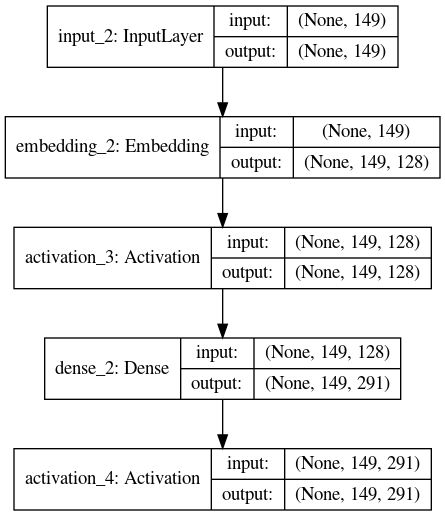

In [19]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Embedding, Activation
from keras.optimizers import Adam
from keras.utils import plot_model

model = Sequential()
model.add(InputLayer(input_shape=(MAX_LENGTH, )))
model.add(Embedding(len(word2index), 128))
model.add(Activation('relu'))
model.add(Dense(len(tag2index)))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
 
model.summary()

plot_model(model, to_file='Plot/model/model-mb00.png', show_shapes=True)

### Se desarrolla el entrenamiento del modelo, este es el alimentador de la red neuronal, aquíne

In [20]:
#sudo pip install h5py
import os
model_hist = model.fit(train_sentences_X, cat_train_tags_y,
                       validation_data=(eval_sentences_X, cat_eval_tags_y),
                       batch_size=128, 
                       epochs=40,
                       validation_split=0.2)

# serialize model to JSON
model_json = model.to_json()
with open("model/mb-00.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model/mb-00.h5")
print("Saved model to disk")

/home/deep-learning/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3618 samples, validate on 1206 samples
Epoch 1/40
3618/3618 [==============================] - 5s 1ms/step - loss: 5.5601 - accuracy: 0.7191 - val_loss: 5.4152 - val_accuracy: 0.8999
Epoch 2/40
3618/3618 [==============================] - 2s 529us/step - loss: 5.2269 - accuracy: 0.9040 - val_loss: 4.9689 - val_accuracy: 0.9021
Epoch 3/40
3618/3618 [==============================] - 2s 519us/step - loss: 4.6441 - accuracy: 0.9064 - val_loss: 4.2251 - val_accuracy: 0.9026
Epoch 4/40
3618/3618 [==============================] - 2s 455us/step - loss: 3.7481 - accuracy: 0.9033 - val_loss: 3.1685 - val_accuracy: 0.8993
Epoch 5/40
3618/3618 [==============================] - 2s 568us/step - loss: 2.5872 - accuracy: 0.9037 - val_loss: 1.9543 - val_accuracy: 0.9038
Epoch 6/40
3618/3618 [==============================] - 2s 547us/step - loss: 1.4873 - accuracy: 0.9084 - val_loss: 1.0981 - val_accuracy: 0.9098
Epoch 7/40
3618/3618 [==============================] - 2s 523us/step - loss: 

## PARTE 3  -  Evaluación del Modelo

### Evaluamos el modelo y calculamos el valor de precision con respecto a los datos de prueba

In [21]:
scores = model.evaluate(test_sentences_X, cat_test_tags_y)
print(f"{model.metrics_names[1]}: {scores[1] * 100}")   # acc: 97.66269326210022

1206/1206 [==============================] - 0s 272us/step
accuracy: 96.78119421005249


### Definimos la funcion que nos servira para graficar el comportamiento del modelo en cada epoca del entrenamiento

In [23]:
import matplotlib.pyplot as plt

def plot_model_performance(train_loss, train_acc, train_val_loss, train_val_acc):
    """ Plot model loss and accuracy through epochs. """
    blue= '#34495E'
    green = '#2ECC71'
    orange = '#E23B13'
    
    # plot model loss
    fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 8))
    ax1.plot(range(1, len(train_loss) + 1), train_loss, blue, linewidth=5, label='training')
    ax1.plot(range(1, len(train_val_loss) + 1), train_val_loss, green, linewidth=5, label='validation')
    ax1.set_xlabel('# epoch')
    ax1.set_ylabel('loss')
    ax1.tick_params('y')
    ax1.legend(loc='upper right', shadow=False)
    ax1.set_title('Model loss through #epochs', color=orange, fontweight='bold')
    
    # plot model accuracy
    ax2.plot(range(1, len(train_acc) + 1), train_acc, blue, linewidth=5, label='training')
    ax2.plot(range(1, len(train_val_acc) + 1), train_val_acc, green, linewidth=5, label='validation')
    ax2.set_xlabel('# epoch')
    ax2.set_ylabel('accuracy')
    ax2.tick_params('y')
    ax2.legend(loc='lower right', shadow=False)
    ax2.set_title('Model accuracy through #epochs', color=orange, fontweight='bold')
    
    fig.savefig('Plot/training/training-mb-00.png', bbox_inches='tight')

### Procedemos a Graficar el comportamiento del Entrenamiento, tanto del conjunto de entrenamiento como el de validación con respecto a la cantidad de epocas

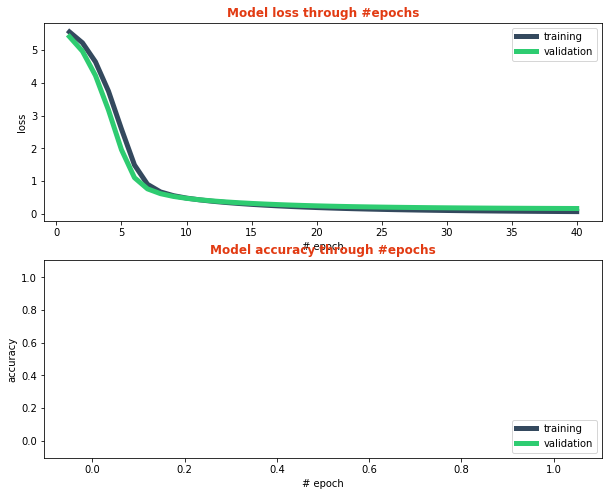

In [24]:
plot_model_performance(
    train_loss=model_hist.history.get('loss', []),
    train_acc=model_hist.history.get('acc', []),
    train_val_loss=model_hist.history.get('val_loss', []),
    train_val_acc=model_hist.history.get('val_acc', [])
)

### Función que Permite convertir Indices en Tags

In [25]:
def logits_to_tokens(sequences, index):
    token_sequences = []
    for categorical_sequence in sequences:
        token_sequence = []
        for categorical in categorical_sequence:
            token_sequence.append(index[np.argmax(categorical)])
 
        token_sequences.append(token_sequence)
 
    return token_sequences

### Hacemos la prediccion sobre el conjunto de pruebas. De la distribución probabilítica a etiquetas. 

In [26]:
import pandas as pd

prediction = model.predict(test_sentences_X)
log_tokens = logits_to_tokens(prediction, {i: t for t, i in tag2index.items()})

print(log_tokens[0])

['da0ms0', 'ncms000', 'aq0cs0', 'vaip3s0', 'vmp00sm', 'pr0cn000', 'da0fs0', 'ncfs000', 'sps00', 'np0000o', 'vaip3s0', 'vmp00sm', 'sps00', 'Fe', 'vmn0000', 'Fe', 'Fc', 'cc', 'sn.e-SUJ', 'vaip3s0', 'np0000p', 'pr0cn000', 'da0ms0', 'ncms000', 'sps00', 'da0ms0', 'ncms000', 'vmip3s0', 'pr0cn000', 'sps00', 'da0ms0', 'np0000l', 'Fe', 'di0mp0', 'vmip3p0', 'sps00', 'da0fs0', 'di0fs0', 'ncfs000', 'Fe', 'Fp', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PA

### Hallamos los valores de F1 score, recall, precision

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

results = pd.DataFrame(columns=['Expected', 'Predicted'])
k = 0
for i, lista_etiquetas_oracion in enumerate(test_tags):
    for j, etiquetas in enumerate(lista_etiquetas_oracion):
        k = k + 1
        results.loc[k, 'Expected'] = etiquetas
        results.loc[k, 'Predicted'] = log_tokens[i][j]

# print(results)


print('\nclassification_report:\n', classification_report(results['Expected'], results['Predicted']))

/home/deep-learning/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/deep-learning/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



classification_report:
               precision    recall  f1-score   support

       -PAD-       0.00      0.00      0.00         0
         Faa       0.00      0.00      0.00         2
         Fat       0.00      0.00      0.00         5
          Fc       1.00      1.00      1.00      2291
          Fd       1.00      1.00      1.00        87
          Fe       1.00      1.00      1.00       631
          Fg       1.00      1.00      1.00       226
          Fh       0.00      0.00      0.00         3
         Fia       0.00      0.00      0.00         6
         Fit       1.00      1.00      1.00        19
          Fp       1.00      1.00      1.00      1178
         Fpa       1.00      1.00      1.00       156
         Fpt       1.00      1.00      1.00       160
          Fs       0.00      0.00      0.00        13
          Fx       1.00      1.00      1.00        41
          Fz       0.00      0.00      0.00         2
           W       0.94      0.61      0.74       194
  

## PARTE 4  -  Testing

### Creamos un pequeño Ejemplo

In [28]:
test_samples = [
    "Correr es importante para mi .".split(),
    "El hombre bajo corre bajo el puente con bajo índice de adrenalina .".split()
]
print(test_samples)

[['Correr', 'es', 'importante', 'para', 'mi', '.'], ['El', 'hombre', 'bajo', 'corre', 'bajo', 'el', 'puente', 'con', 'bajo', 'índice', 'de', 'adrenalina', '.']]


### Convertimos el texto en Una entrada para el Modelo y se generan los dos vecores de enteros de las dos oraciones.

In [31]:
test_samples_X = []
for s in test_samples:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
    test_samples_X.append(s_int)

test_samples_X = pad_sequences(test_samples_X, maxlen=MAX_LENGTH, padding='post')
print(test_samples_X)
print(test_samples_X.shape)

[[ 4856 23601  1321 18489  2524 20162     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [19608  8058 24283 15632 24283 19608  9027  2393 24283  1616  3361     1
  201

### Se Ejecuta la predicion con la Entrada del modelo entrenado y el modelo de la red neuronal predice un matriz de 149 X 291 por cada oración. El shape de a predicción es (2, 149,291)

In [30]:
predictions = model.predict(test_samples_X)
print(predictions, predictions.shape)


[[[7.5042386e-05 1.5895135e-05 3.6202481e-03 ... 4.5181448e-03
   1.5145507e-05 3.9067720e-05]
  [2.8254644e-07 6.8431660e-09 3.9008522e-05 ... 8.7296119e-04
   5.2868998e-09 2.2787019e-07]
  [2.1605056e-06 1.0740614e-07 6.6344117e-05 ... 2.2949844e-04
   1.2365389e-07 1.0185281e-06]
  ...
  [9.9723780e-01 6.3825732e-06 1.1974130e-05 ... 1.2506964e-05
   5.9469376e-06 1.0376452e-05]
  [9.9723780e-01 6.3825732e-06 1.1974130e-05 ... 1.2506964e-05
   5.9469376e-06 1.0376452e-05]
  [9.9723780e-01 6.3825732e-06 1.1974130e-05 ... 1.2506964e-05
   5.9469376e-06 1.0376452e-05]]

 [[7.0344308e-06 2.5763387e-07 1.4716035e-05 ... 6.1915605e-05
   2.9183417e-07 1.0744342e-06]
  [7.9210768e-05 3.2983216e-06 5.4713710e-05 ... 2.3183234e-03
   2.6260675e-06 2.8955546e-05]
  [1.0971029e-03 2.7434411e-05 4.8723546e-04 ... 7.1953138e-04
   2.8749289e-05 3.6951238e-05]
  ...
  [9.9723780e-01 6.3825732e-06 1.1974130e-05 ... 1.2506964e-05
   5.9469376e-06 1.0376452e-05]
  [9.9723780e-01 6.3825732e-06 1.197

### Conversion de la Salida del Modelo a un lista de Indices de Tags

In [33]:
#print(len(predictions))
log_tokens = logits_to_tokens(predictions, {i: t for t, i in tag2index.items()})
print(log_tokens)

[['vmn0000', 'vsip3s0', 'aq0cs0', 'sps00', 'dp1css', 'Fp', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD

### Presentación de los Resultados

In [34]:
#!pip install tabulate
from tabulate import tabulate

heads1 = test_samples[0]
body1 = [log_tokens[0][:len(test_samples[0])]]

heads2 = test_samples[1]
body2 = [log_tokens[1][:len(test_samples[1])]]

print(tabulate(body1, headers=heads1))

print ("\n")

print(tabulate(body2, headers=heads2))


## postagging Freeling 4.1

## El      hombre   bajo     corre    bajo  el      puente   con  bajo  índice   de  adrenalina  .
## DA0MS0  NCMS000  AQ0MS00  VMIP3S0  SP    DA0MS0  NCMS000  SP   SP    NCMS000  SP  NCFS000     Fp


## pos tagger Stanford NLP

## El      hombre   bajo     corre    bajo  el      puente   con    bajo   índice  de    adrenalina  .
## da0000  nc0s000  aq0000   vmip000  sp000 da0000  nc0s000  sp000  aq0000 nc0s000 sp000 nc0s000     fp

Correr    es       importante    para    mi      .
--------  -------  ------------  ------  ------  ---
vmn0000   vsip3s0  aq0cs0        sps00   dp1css  Fp


El      hombre    bajo    corre    bajo    el      puente    con    bajo    índice    de     adrenalina    .
------  --------  ------  -------  ------  ------  --------  -----  ------  --------  -----  ------------  ---
da0ms0  ncms000   sps00   vmip3s0  sps00   da0ms0  ncms000   sps00  sps00   ncms000   sps00  ncfs000       Fp
